In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data = pd.read_csv("emails.csv")

In [3]:
print(data.columns)


Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


In [4]:
print(data.isnull().sum())

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [5]:
data.drop(columns=['Email No.'], inplace=True)

In [6]:
print(data.tail())

      the  to  ect  and  for  of    a  you  hou  in  ...  connevey  jay  \
5167    2   2    2    3    0   0   32    0    0   5  ...         0    0   
5168   35  27   11    2    6   5  151    4    3  23  ...         0    0   
5169    0   0    1    1    0   0   11    0    0   1  ...         0    0   
5170    2   7    1    0    2   1   28    2    0   8  ...         0    0   
5171   22  24    5    1    6   5  148    8    2  23  ...         0    0   

      valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
5167       0    0               0         0         0   0    0           0  
5168       0    0               0         0         0   1    0           0  
5169       0    0               0         0         0   0    0           1  
5170       0    0               0         0         0   1    0           1  
5171       0    0               0         0         0   0    0           0  

[5 rows x 3001 columns]


In [7]:
print(data.isnull().any().value_counts())


False    3001
Name: count, dtype: int64


In [8]:
x = data.iloc[:, :-1] 
y = data.iloc[:, -1] 

In [9]:
print(x.shape, y.shape)


(5172, 3000) (5172,)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
models = {
 "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
 "Support Vector Machine": SVC(kernel='linear')
}

In [13]:
for model_name, model in models.items():
 model.fit(x_train, y_train)
 y_pred = model.predict(x_test)

 print(f"\n{model_name} Results:")
 print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
 print("Classification Report:")
 print(classification_report(y_test, y_pred))
 print("Confusion Matrix:")
 print(confusion_matrix(y_test, y_pred))


K-Nearest Neighbors Results:
Accuracy: 0.8350515463917526
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       568
           1       0.62      0.96      0.76       208

    accuracy                           0.84       776
   macro avg       0.80      0.88      0.82       776
weighted avg       0.89      0.84      0.84       776

Confusion Matrix:
[[448 120]
 [  8 200]]

Support Vector Machine Results:
Accuracy: 0.9445876288659794
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       568
           1       0.88      0.92      0.90       208

    accuracy                           0.94       776
   macro avg       0.92      0.94      0.93       776
weighted avg       0.95      0.94      0.95       776

Confusion Matrix:
[[541  27]
 [ 16 192]]


In [14]:
example_emails = x_test[:5] 
for i, email in enumerate(example_emails):
 knn_prediction = models["K-Nearest Neighbors"].predict([email])
 svm_prediction = models["Support Vector Machine"].predict([email])
 print(f"\nEmail {i+1}:")
 print(f"KNN Prediction: {'Spam' if knn_prediction[0] else 'Not Spam'}")
 print(f"SVM Prediction: {'Spam' if svm_prediction[0] else 'Not Spam'}")


Email 1:
KNN Prediction: Not Spam
SVM Prediction: Not Spam

Email 2:
KNN Prediction: Not Spam
SVM Prediction: Not Spam

Email 3:
KNN Prediction: Spam
SVM Prediction: Spam

Email 4:
KNN Prediction: Not Spam
SVM Prediction: Not Spam

Email 5:
KNN Prediction: Not Spam
SVM Prediction: Not Spam


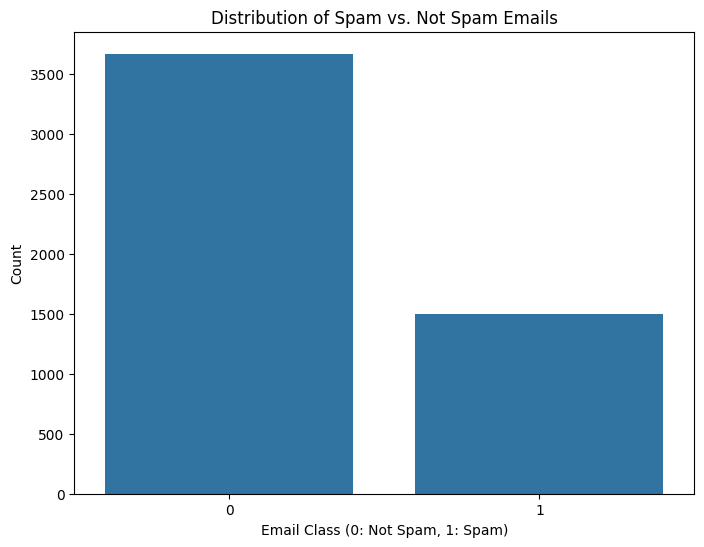

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Spam vs. Not Spam Emails')
plt.xlabel('Email Class (0: Not Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()
